Данные о погоде взяты с сайта [rp5.ru/Архив\_погоды\_в\_Москве\_(ВДНХ)](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))

Данные о выработке электричества в США [https://fred.stlouisfed.org/series/IPG2211A2N](https://fred.stlouisfed.org/series/IPG2211A2N)

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
os.listdir()

['.ipynb_checkpoints', 'IPG2211A2N.xls', 'День 3.ipynb', 'Мск_5лет.xls']

In [6]:
# Загрузили данные
data = pd.read_excel('Мск_5лет.xls', skiprows=6)
# Записали данные в порядке возрастания даты (было наоборот)
data = data[::-1]
# Преобразовали индекс таблицы в правильный формат время
data.index = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], format='%d.%m.%Y %H:%M')
# Оставили в данных только записи в полдень
mask = data.index.hour == 12
data = data[mask]

In [7]:
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
Местное время в Москве (ВДНХ),,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,01.01.2015 12:00,-1.5,743.6,758.5,0.2,96.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02 12:00:00,02.01.2015 12:00,1.5,737.6,752.2,-0.5,97.0,"Ветер, дующий с запада",2,NaN,NaN,...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03 12:00:00,03.01.2015 12:00,2.4,726.1,740.4,0.6,89.0,"Ветер, дующий с запада",2,NaN,NaN,...,NaN,NaN,4.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04 12:00:00,04.01.2015 12:00,0.8,722.2,736.5,0.2,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,NaN,NaN,4.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 12:00:00,05.01.2015 12:00,-8.5,733.3,748.4,1.2,79.0,"Ветер, дующий с северо-запада",3,NaN,NaN,...,"Высококучевые, просвечивающие или плотные в дв...",NaN,4.0,-11.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28 12:00:00,28.12.2019 12:00,-0.7,751.6,766.6,1.5,91.0,"Ветер, дующий с северо-востока",2,NaN,NaN,...,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29 12:00:00,29.12.2019 12:00,-3.6,759.3,774.6,0.5,88.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,...,NaN,NaN,4.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30 12:00:00,30.12.2019 12:00,-3.4,748.6,763.7,-3.3,84.0,"Ветер, дующий с юго-запада",2,NaN,NaN,...,NaN,NaN,4.0,-5.8,NaN,NaN,NaN,NaN,NaN,NaN


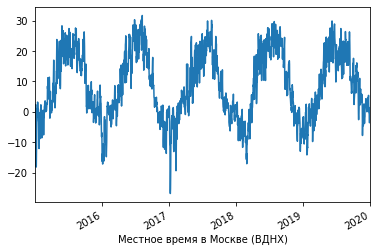

In [8]:
data['T'].plot()

In [61]:
data['T'].max()

31.7

In [62]:
data['T'].min()

-26.9

In [63]:
# Среднее значение
data['T'].mean()

8.772836801752456

In [64]:
# "95-й квантиль случайной величины равен 25.4" = вероятность того, что значение величины будет не выше 25.4 равна 95%

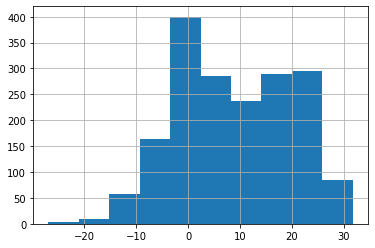

In [65]:
data['T'].hist()

In [ ]:
Квантиль - это значение, которое не будет превышено с определенной вероятностью

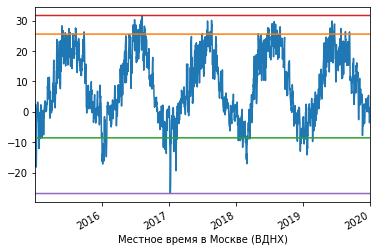

In [9]:
quantile_95 = data['T'].quantile(0.95)
quantile_05 = data['T'].quantile(0.05)
min_val = data['T'].min()
max_val = data['T'].max()
data['T'].plot()
plt.plot(data.index, [quantile_95] * len(data.index), label='Верхняя граница 90%-го интервала')
plt.plot(data.index, [quantile_05] * len(data.index), label='Нижняя граница 90%-го интервала')
plt.plot(data.index, [max_val] * len(data.index), label='Максимальное значение')
plt.plot(data.index, [min_val] * len(data.index), label='Минимальное значение')

In [71]:
# "Корреляция" величина, которая показывает, насколько две величины похожи в своем "поведении".
# Если X и Y растут или убывают одновременно, corr(X, Y) = 1
# Если X растет, Y убывает - corr(X, Y) = -1
# Если связи нет, corr(X, Y) = -0

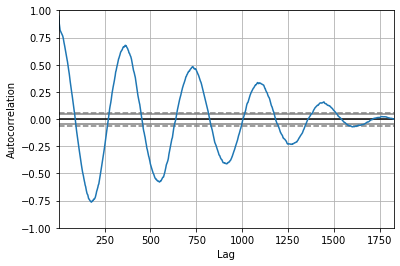

In [72]:
autocorrelation_plot(data['T'])

In [15]:
# Тренд
regressor = LinearRegression()
x_range = list(range(0, len(data)))

# регрессор подстроился 
regressor.fit(pd.DataFrame(x_range), data['T'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

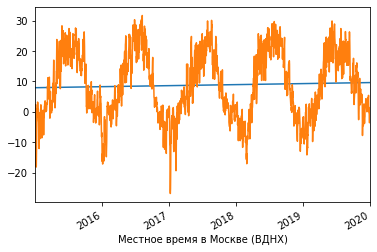

In [16]:
plt.plot(data.index, regressor.predict(pd.DataFrame(x_range)))
data['T'].plot()

In [17]:
# ДЗ:
# взять данные из таблички 'IPG2211A2N.xls'
# построить аналитику аналогично проведенной 
# сделать выводы
# дедлайн 17:00 МСК

In [25]:
# Загрузили данные
data = pd.read_excel('IPG2211A2N.xls', skiprows=10)

In [26]:
# Победители:
# Ivan Zadorozhniy
# Петров Александр Александрович
# Кириченко Станислав 

In [27]:
data

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
967,2019-08-01,111.2697
968,2019-09-01,102.0033
969,2019-10-01,93.9993
970,2019-11-01,99.8843


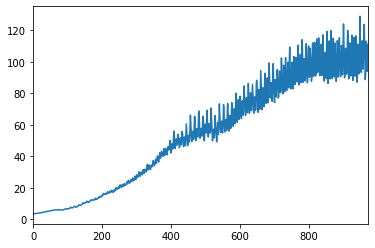

In [35]:
data['IPG2211A2N'].plot()

In [36]:
regressor = LinearRegression()

In [38]:
regressor.fit(pd.DataFrame(data.index), data['IPG2211A2N'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
trend = regressor.predict(pd.DataFrame(data.index))

In [46]:
data.index = pd.to_datetime(data['observation_date'])

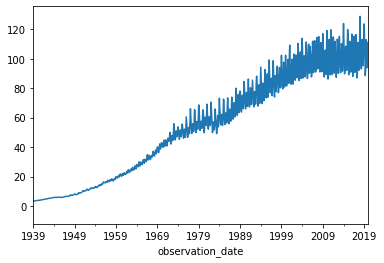

In [48]:

data['IPG2211A2N'].plot()
plt.plot(data.index, trend)

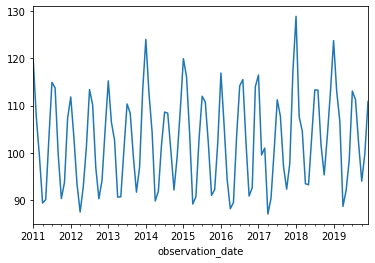

In [50]:
mask = data.index.year > 2010
data = data[mask]
data['IPG2211A2N'].plot()